In [1]:
"""
My name is Andrew Dodds and this script was developed on 11/20/2025.

The goal for this project is to build a predictive model for a binary classification problem
using supervised learning for predicting class labels with the dependent variable as y.

In previous files I have cleaned the data and analyzed features through visualizations. In
this file, I will build a logistic regression model with y as the dependent variable. The data
will be split into training and testing sets, scaled, and then fit to the model. I will iterate
through the model a few times to try to improve the accuracy of the model through l1 regularization,
k-fold cross validation, feature selection and engineering, and hyperparameter tuning.

I used a lot from our scikit learn live coding with regression and plotting.
"""

'\nMy name is Andrew Dodds and this script was developed on 11/20/2025.\n\nThe goal for this project is to build a predictive model for a binary classification problem\nusing supervised learning for predicting class labels with the dependent variable as y.\n\nIn previous files I have cleaned the data and analyzed features through visualizations. In\nthis file, I will build a logistic regression model with y as the dependent variable. The data\nwill be split into training and testing sets, scaled, and then fit to the model. I will iterate\nthrough the model a few times to try to improve the accuracy of the model through l1 regularization,\nk-fold cross validation, feature selection and engineering, and hyperparameter tuning.\n\nI used a lot from our scikit learn live coding with regression and plotting.\n'

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [30]:
# Read the data from the CSV file into a DataFrame and display the data
pd.set_option('display.max_columns', None) # Display alone does not work because there are too many columns so force display all columns
data = pd.read_csv('p3_cleaned_data.csv')
data = data.drop("Unnamed: 0", axis = 1)
originalData = data # Storing the unmodified data for later use
display(data)

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
0,1,54359,0,50,5,5,5,4,3,5.0,3,3,4,5,5,3,4,3,21,12.0,0,0,1,192,2.380952,50
1,1,84649,0,44,1,1,1,1,3,3.0,1,4,4,4,4,4,4,2,0,0.0,1,0,1,1034,6.415983,44
2,0,59015,0,72,3,1,5,5,3,2.0,2,3,3,3,3,1,3,2,0,8.0,1,0,3,1452,6.415983,72
3,0,99990,0,38,1,3,1,3,5,1.0,5,5,2,4,4,1,4,5,0,0.0,1,1,3,916,6.415983,38
4,1,83569,1,37,5,5,5,5,2,5.0,5,4,4,4,4,4,4,5,0,0.0,1,0,1,390,6.415983,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5.0,5,5,3,2,5,3,5,5,70,38.0,1,0,1,1371,0.385714,27
104718,0,23530,0,62,1,4,4,4,4,2.0,4,1,1,1,1,3,1,3,6,33.0,1,0,2,1703,10.333333,62
104719,0,88477,1,45,3,4,3,5,1,3.0,1,1,3,3,5,3,4,1,16,7.0,1,1,3,562,2.812500,45
104720,0,17164,1,57,2,4,2,2,4,2.0,4,4,3,4,5,2,3,4,0,0.0,1,1,2,315,6.415983,57


In [31]:
X = data.drop("y", axis = 1)
y = data["y"]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83777, 25) (20945, 25)
(83777,) (20945,)


In [32]:
# From titanic live coding: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print(f"Mean: {scaler.mean_}")
print(f"Variance: {scaler.var_}")

Mean: [5.18487624e+04 4.92235339e-01 3.91916397e+01 2.73430655e+00
 3.06240376e+00 2.75976700e+00 2.97707008e+00 3.20189312e+00
 3.32823674e+00 3.43964334e+00 3.35818900e+00 3.37892262e+00
 3.34816238e+00 3.63036394e+00 3.30362749e+00 3.63924466e+00
 3.28732230e+00 1.49784070e+01 1.53328425e+01 8.17599102e-01
 3.12985664e-01 1.97656875e+00 1.18554677e+03 6.41027162e+00
 3.91916397e+01]
Variance: [9.01159296e+08 2.49939710e-01 2.31620877e+02 1.76144920e+00
 2.32803458e+00 1.95458265e+00 1.63427852e+00 1.76591642e+00
 1.56668681e+00 1.73941603e+00 1.77864407e+00 1.66102990e+00
 1.72422980e+00 1.39764470e+00 1.60210592e+00 1.38457920e+00
 1.72196265e+00 1.50752841e+03 1.54531005e+03 1.49130810e-01
 2.15025638e-01 9.27020596e-01 9.90123067e+05 5.14025899e+01
 2.31620877e+02]


In [33]:
scaleXTrain = scaler.transform(X_train)
scaleXTest = scaler.transform(X_test)
print(f"Scaled trained mean: {scaleXTrain.mean(axis=0)}")
print(f"Scale traned standard deviation: {scaleXTrain.std(axis=0)}")
# Mean is essentially 0 and std is 1 so scaling is a success

Scaled trained mean: [-7.97247659e-18 -4.57993336e-17  1.89303912e-16 -1.01437043e-16
 -3.29076693e-17  3.86749928e-17  4.00320101e-17  4.81741139e-17
  3.00833771e-16 -4.54600793e-17  1.00419280e-16 -1.20435285e-16
 -1.14667961e-16 -6.71723560e-17  1.86589878e-16 -5.69947263e-17
 -1.52070750e-16 -2.13730224e-17 -2.01856322e-17  1.12632435e-16
  6.54760844e-17  7.17098826e-17  2.95999397e-17  1.01437043e-16
  1.89303912e-16]
Scale traned standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [35]:
# Baseline logistic regression model with y as the dependent variable and the scaled test train data
# From scikit learn live coding
baseModel = LogisticRegression()
baseModel.fit(scaleXTrain, y_train)
yPred = baseModel.predict(scaleXTest)
print(f"Accuracy from the test set: {baseModel.score(scaleXTest, y_test)}")
print(f"Accuracy from the train set: {baseModel.score(scaleXTrain, y_train)}") # for the report 

Accuracy from the test set: 0.8733826688947243
Accuracy from the train set: 0.8751208565596763


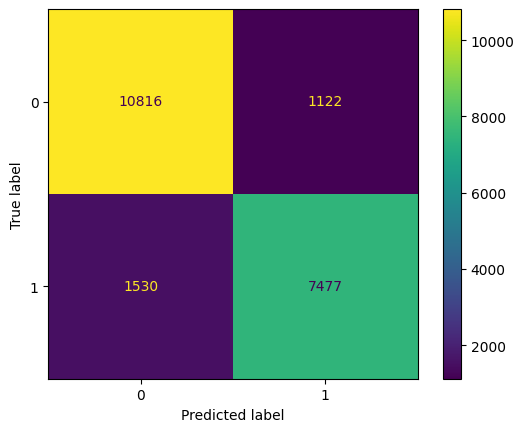

In [9]:
# Confusion matrix and plot for baseline model
cm = metrics.confusion_matrix(y_test, baseModel.predict(scaleXTest))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

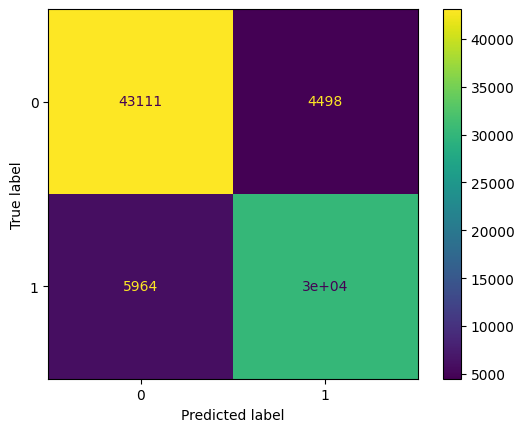

In [36]:
# Confusion matrix and plot for baseline model training set for the report
cm = metrics.confusion_matrix(y_train, baseModel.predict(scaleXTrain))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

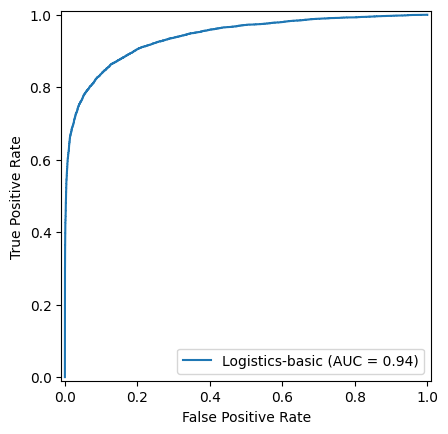

In [10]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, baseModel.predict_proba(scaleXTest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

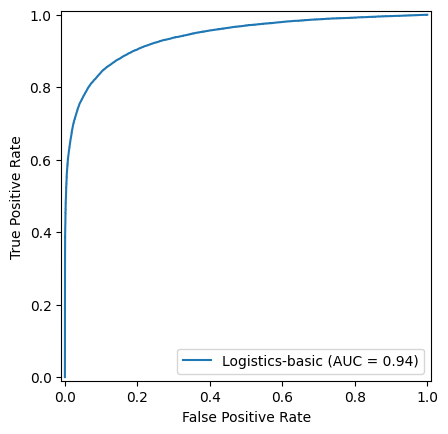

In [37]:
# Plot ROC/AUC curve for the training set
fpr, tpr, thresholds = metrics.roc_curve(y_train, baseModel.predict_proba(scaleXTrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

In [38]:
'''
The baseline model already had an accuracy of 0.87 which is pretty good considering no fine tuning yet.
The next steps are to try checking for feature importance and using feature engineering techniques to improve AUC values,
then try hyperparameter tuning with RandomizedSearchCV to further improved the model
'''
from IPython.display import display
# https://www.geeksforgeeks.org/machine-learning/understanding-feature-importance-in-logistic-regression-models/ - getting importance for logistic regression
logisticCoefficients = baseModel.coef_[0]
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': logisticCoefficients})
display(importance)

,Feature,Importance
0,x2,-0.025510
1,x3,0.035746
2,x5,-0.065082
3,x9,0.401233
4,x10,-0.187282
5,x11,-0.177928
6,x12,0.061477
7,x13,-0.048266
8,x14,1.357311
9,x15,-0.056076


In [39]:
'''
Positive coefficients help predict y = 1 and negative help predict y = 0.
Features that have little to no impact seem to be x2, x3, x5, x6, x13, x15, x29, and x31
'''
data = data.drop("x2", axis = 1)
data = data.drop("x3", axis = 1)
data = data.drop("x5", axis = 1)
data = data.drop("x6", axis = 1)
data = data.drop("x13", axis = 1)
data = data.drop("x15", axis = 1)
data = data.drop("x29", axis = 1)
data = data.drop("x31", axis = 1)
display(data)

,y,x9,x10,x11,x12,x14,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28
0,1,5,5,5,4,5.0,3,4,5,5,3,4,3,21,12.0,0,0,1
1,1,1,1,1,1,3.0,4,4,4,4,4,4,2,0,0.0,1,0,1
2,0,3,1,5,5,2.0,3,3,3,3,1,3,2,0,8.0,1,0,3
3,0,1,3,1,3,1.0,5,2,4,4,1,4,5,0,0.0,1,1,3
4,1,5,5,5,5,5.0,4,4,4,4,4,4,5,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,5,5,5,5,5.0,5,3,2,5,3,5,5,70,38.0,1,0,1
104718,0,1,4,4,4,2.0,1,1,1,1,3,1,3,6,33.0,1,0,2
104719,0,3,4,3,5,3.0,1,3,3,5,3,4,1,16,7.0,1,1,3
104720,0,2,4,2,2,2.0,4,3,4,5,2,3,4,0,0.0,1,1,2


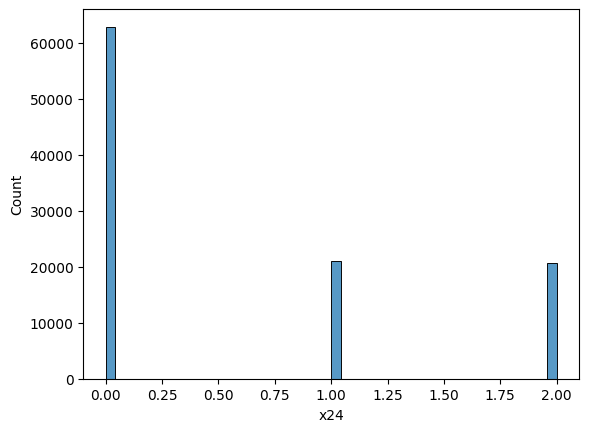

In [40]:
# Feature engineering to improve AUC values (discretization to get category bins)
# x24 has a wide range of values so I think it would be interesting to sort it into discrete bins and see the impact on AUC
# https://www.geeksforgeeks.org/python/how-to-use-pandas-cut-and-qcut/
data["x24"] = pd.qcut(data["x24"], q = 5, labels = False, duplicates = "drop")
# display entire x24 column
sns.histplot(data["x24"])
plt.show()


In [44]:
# Get x and y after checking for importance and feature engineering
X = data.drop("y", axis = 1)
y = data["y"]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83777, 17) (20945, 17)
(83777,) (20945,)


In [45]:
# Rescale
scaler = preprocessing.StandardScaler().fit(X_train)
scaleXTrain = scaler.transform(X_train)
scaleXTest = scaler.transform(X_test)
print(f"Scaled trained mean: {scaleXTrain.mean(axis=0)}")
print(f"Scale traned standard deviation: {scaleXTrain.std(axis=0)}")

Scaled trained mean: [-1.01437043e-16 -3.29076693e-17  3.86749928e-17  4.00320101e-17
  3.00833771e-16  1.00419280e-16 -1.20435285e-16 -1.14667961e-16
 -6.71723560e-17  1.86589878e-16 -5.69947263e-17 -1.52070750e-16
 -2.13730224e-17 -4.34245534e-17  1.12632435e-16  6.54760844e-17
  7.17098826e-17]
Scale traned standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
# Second logistic regression model with y as the dependent variable and the scaled test train data
# From scikit learn live coding - this time using importance and feature engineering
secondModel = LogisticRegression()
secondModel.fit(scaleXTrain, y_train)
yPred = secondModel.predict(scaleXTest)
print(f"Accuracy for the test set: {secondModel.score(scaleXTest, y_test)}")
print(f"Accuracy from the train set: {secondModel.score(scaleXTrain, y_train)}") # for the report 

Accuracy for the test set: 0.8747195034614467
Accuracy from the train set: 0.875264093963737


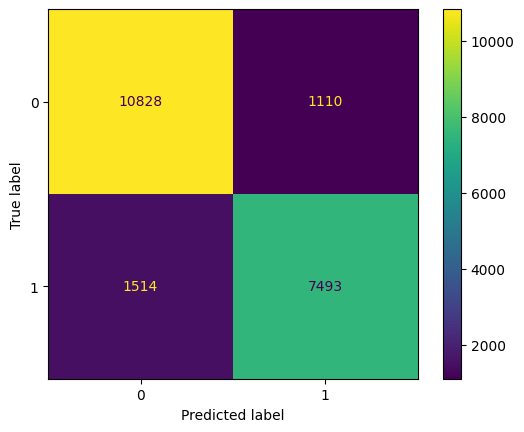

In [47]:
# Confusion matrix and plot for second model
cm = metrics.confusion_matrix(y_test, secondModel.predict(scaleXTest))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

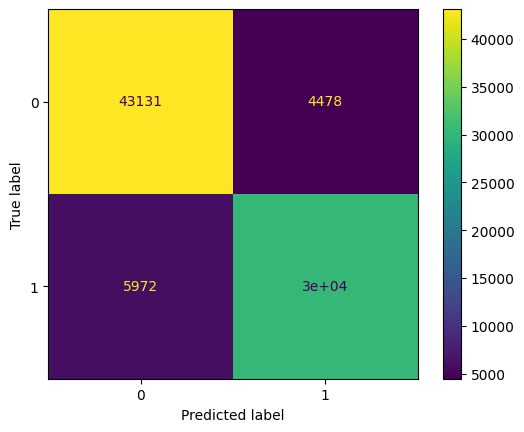

In [48]:
# Confusion matrix and plot for second model training
cm = metrics.confusion_matrix(y_train, secondModel.predict(scaleXTrain))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

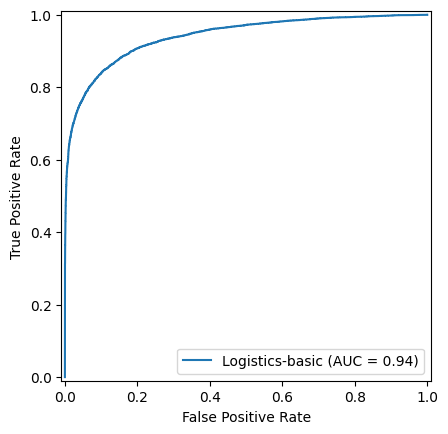

In [18]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, secondModel.predict_proba(scaleXTest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

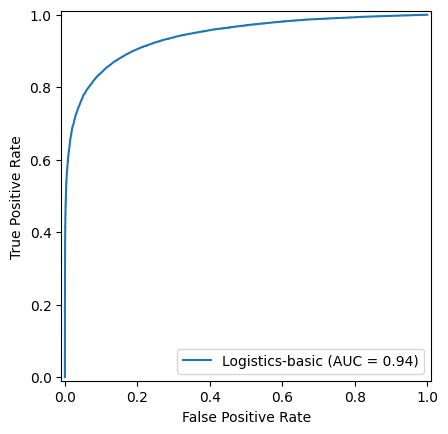

In [49]:
# Plot ROC/AUC curve for the training set
fpr, tpr, thresholds = metrics.roc_curve(y_train, secondModel.predict_proba(scaleXTrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

In [50]:
# For the third model iteration I will try hyperparameter tuning with RandomizedSearchCV to further improve the model using the scikit learn live coding
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html'
from IPython.display import display
display(data)

,y,x9,x10,x11,x12,x14,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28
0,1,5,5,5,4,5.0,3,4,5,5,3,4,3,21,1,0,0,1
1,1,1,1,1,1,3.0,4,4,4,4,4,4,2,0,0,1,0,1
2,0,3,1,5,5,2.0,3,3,3,3,1,3,2,0,1,1,0,3
3,0,1,3,1,3,1.0,5,2,4,4,1,4,5,0,0,1,1,3
4,1,5,5,5,5,5.0,4,4,4,4,4,4,5,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,5,5,5,5,5.0,5,3,2,5,3,5,5,70,2,1,0,1
104718,0,1,4,4,4,2.0,1,1,1,1,3,1,3,6,2,1,0,2
104719,0,3,4,3,5,3.0,1,3,3,5,3,4,1,16,1,1,1,3
104720,0,2,4,2,2,2.0,4,3,4,5,2,3,4,0,0,1,1,2


In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Define the hyperparameter grid ---feel free to customize these
# I chose hyperparameters that seemed to have impact on the model, the others on the scikit learn website did not add much value
params = {'solver': ['saga', 'liblinear', 'newton-cg', 'newton-cholesky'],
                  'penalty': ['l1', 'l2', 'elasticnet', None],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                  'max_iter' : [10,100,500],
          'dual': [True, False],
          }

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator=LogisticRegression(),  # the model
                            param_distributions=params,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

In [52]:
X = data.drop("y", axis = 1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83777, 17) (20945, 17)
(83777,) (20945,)


In [53]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaleXTrain = scaler.transform(X_train)
scaleXTest = scaler.transform(X_test)
print(f"Scaled trained mean: {scaleXTrain.mean(axis=0)}")
print(f"Scale traned standard deviation: {scaleXTrain.std(axis=0)}")

Scaled trained mean: [-1.01437043e-16 -3.29076693e-17  3.86749928e-17  4.00320101e-17
  3.00833771e-16  1.00419280e-16 -1.20435285e-16 -1.14667961e-16
 -6.71723560e-17  1.86589878e-16 -5.69947263e-17 -1.52070750e-16
 -2.13730224e-17 -4.34245534e-17  1.12632435e-16  6.54760844e-17
  7.17098826e-17]
Scale traned standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
grid.fit(scaleXTrain, y_train)
print(grid.best_params_)

{'solver': 'newton-cg', 'penalty': None, 'max_iter': 500, 'dual': False, 'C': 100}


In [55]:
# third model
thirdModel = grid.best_estimator_
print(f"Accuracy: {metrics.accuracy_score(y_test, thirdModel.predict(scaleXTest))}")
print(f"Accuracy from the train set: {metrics.accuracy_score(y_train, thirdModel.predict(scaleXTrain))}") # for the report 

Accuracy: 0.874671759369778
Accuracy from the train set: 0.8752044117120451


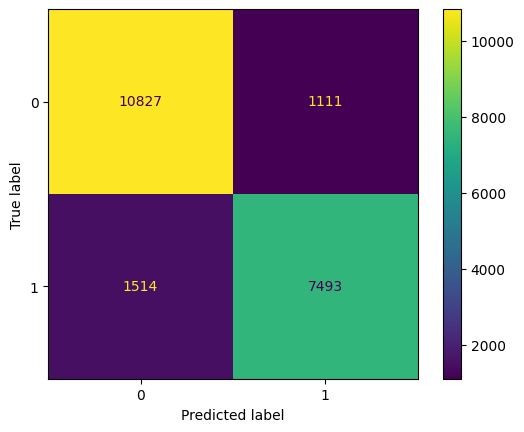

In [26]:
# Confusion matrix and plot for third model
cm = metrics.confusion_matrix(y_test, thirdModel.predict(scaleXTest))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

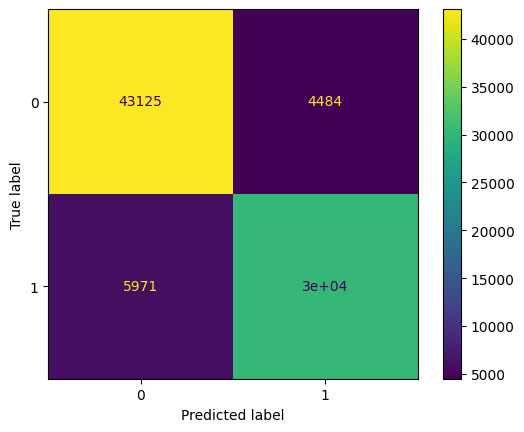

In [56]:
# Confusion matrix and plot for third model training set
cm = metrics.confusion_matrix(y_train, thirdModel.predict(scaleXTrain))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

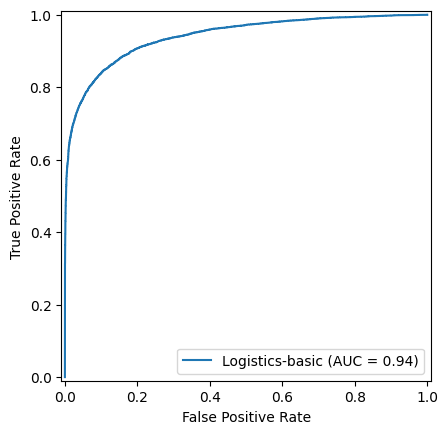

In [27]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, thirdModel.predict_proba(scaleXTest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

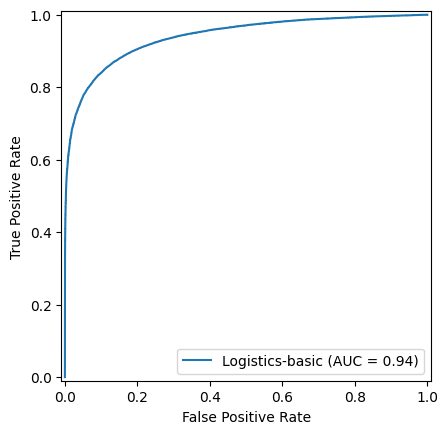

In [57]:
# Plot ROC/AUC curve for the training set
fpr, tpr, thresholds = metrics.roc_curve(y_train, thirdModel.predict_proba(scaleXTrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()